In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dataset import PolarisPublicationData

In [2]:
data = PolarisPublicationData()

In [3]:
df = data.load_data(figure='S6')

In [4]:
rc_vals = sorted(df['Receptive Field'].unique())

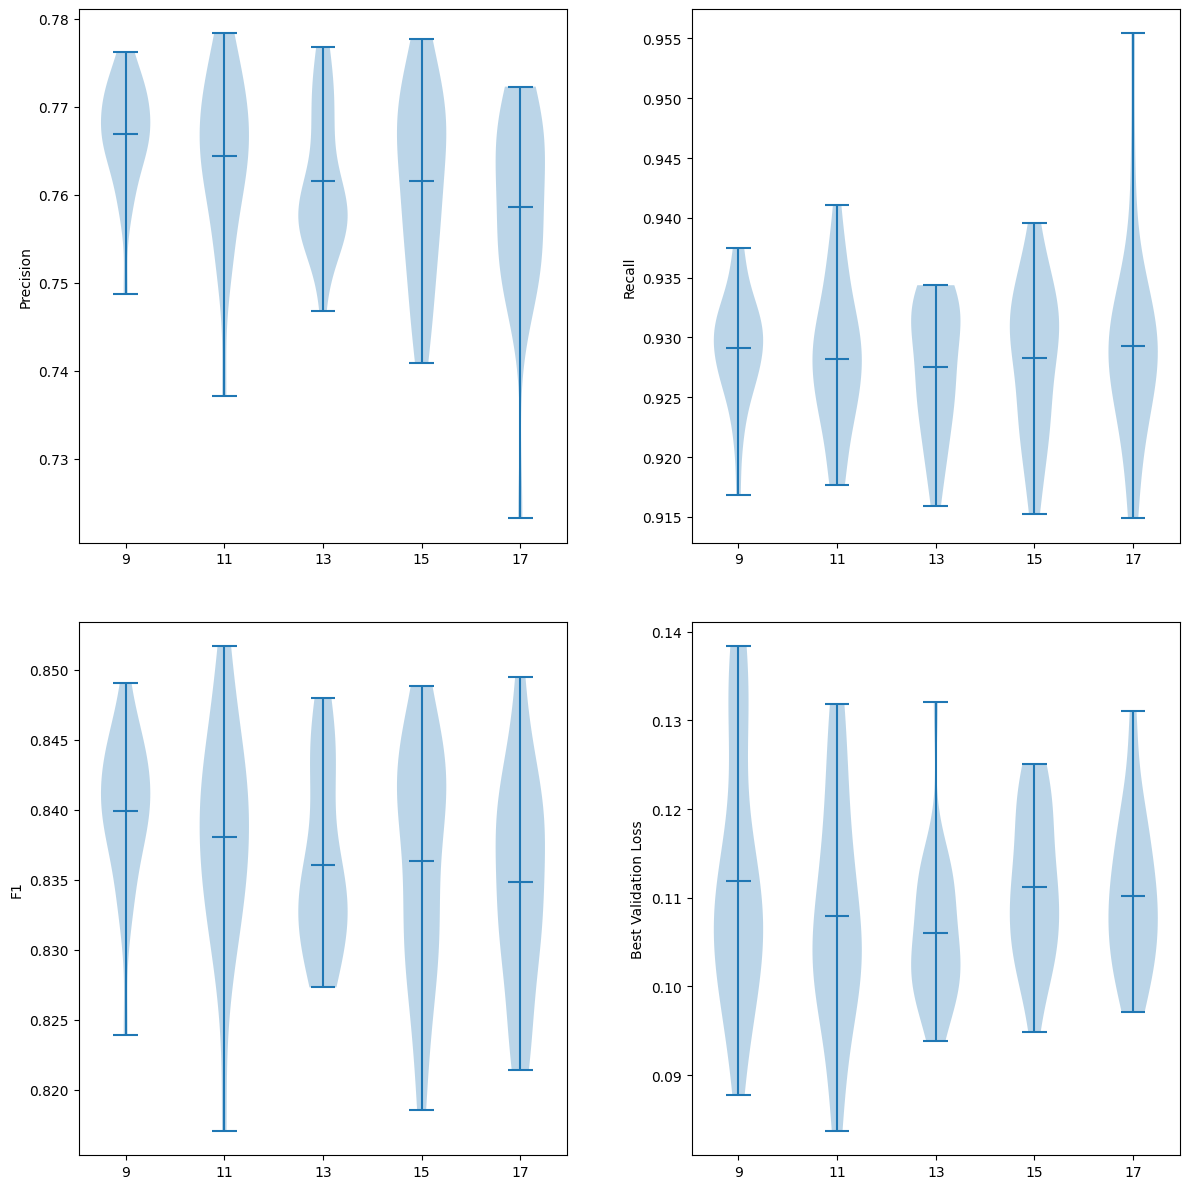

In [5]:
fig,ax = plt.subplots(2,2,figsize=(12,12))

prec_vals = np.zeros([24,5])
for i,val in enumerate(rc_vals):
    filter_df = df.loc[df['Receptive Field'] == val].iloc[:24]
    prec_vals[:,i] = filter_df.Precision
ax[0,0].violinplot(prec_vals, showmeans=True)
ax[0,0].set_ylabel('Precision')

rec_vals = np.zeros([24,5])
for i,val in enumerate(rc_vals):
    filter_df = df.loc[df['Receptive Field'] == val].iloc[:24]
    rec_vals[:,i] = filter_df.Recall
ax[0,1].violinplot(rec_vals, showmeans=True)
ax[0,1].set_ylabel('Recall')

f1_vals = np.zeros([24,5])
for i,val in enumerate(rc_vals):
    filter_df = df.loc[df['Receptive Field'] == val].iloc[:24]
    f1_vals[:,i] = filter_df.F1
ax[1,0].violinplot(f1_vals, showmeans=True)
ax[1,0].set_ylabel('F1')

loss_vals = np.zeros([24,5])
for i,val in enumerate(rc_vals):
    filter_df = df.loc[df['Receptive Field'] == val].iloc[:24]
    loss_vals[:,i] = filter_df['Best Val. Loss']
ax[1,1].violinplot(loss_vals, showmeans=True)
ax[1,1].set_ylabel('Best Validation Loss')

for i in range(2):
    for ii in range(2):
        ax[i,ii].set_xticks(np.arange(1,6), labels=['9','11','13','15','17'])
        
plt.tight_layout(w_pad=4, h_pad=4)
plt.show()